### Numerical Normalization

- Numerical data values are often wildly different in magnitude from column to column; depends on units and what is being measured
- It can help to *normalize* them into well-known, well-behaved ranges
  - Especially helpful for some predictive models

#### Types of normalization
- Standardization: makes a dataset zero-mean, unit-variance ($\sigma^2=1$, also means that $\sigma=1$).
$$ \hat{x}_i = \frac{x_i -\mu}{\sigma}$$
- These "z-scores" have some nice interpretability:
  - $\hat{x}_i < 0$, smaller than average
  - $\hat{x}_i > 0$, greater than average
  - $\hat{x}_i > 1$, more than one standard deviation above average
  - etc.
  - Can give context to how normal or anomalous a datapoint is

![bell](https://drive.google.com/uc?id=18c-aDxZ28KM7V0T5jbLc-bsdq6m2KGQD)



- 0-1 normalization
$$ \hat{x}_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}$$
  - Here $x_{max}$ and $x_{min}$ are the max/min values observed in the dataset -- ***or*** a theoretical min or max.
  - Warning: if a new datapoint comes along and you use the same mapping, can get values that are $<0$ or $>1$.
- To make values non-negative, can exponentiate:
$$ \hat{x}_i = e^{x_i}$$
  - $x_i \to -\infty$, normalized value approaches 0

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data_url = "https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/data/NHANES/NHANES.csv"
cols_renamed = {"SEQN": "SEQN",
                "RIAGENDR": "Gender", # 1 = M, 2 = F
                "RIDAGEYR": "Age", # years
                "BMXWT": "Weight", # kg
                "BMXHT": "Height", # cm
                "BMXLEG": "Leg", # cm
                "BMXARML": "Arm", # cm
                "BMXARMC": "Arm Cir", # cm
                "BMXWAIST": "Waist Cir"} # cm

df = pd.read_csv(data_url)
df = df.rename(cols_renamed, axis='columns')
df = df.drop("SEQN", axis='columns')
df = df[df["Age"] >= 21]

In [ ]:
# is an arm circumference of 40 (cm) big, little? 

mean = df['Arm Cir'].mean()
std  = df['Arm Cir'].std()
(20-mean)/std

-2.5392403094656117

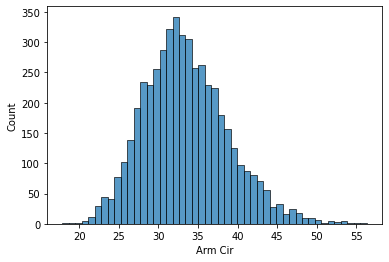

In [ ]:
sns.histplot(df['Arm Cir'])

### Linear Algebra Essentials Part 1

We will talk about *vectors*. Vectors are sort of like math pandas Series.

#### Vectors
- A vector is an ordered sequence of numbers
- Notation:
  - $x \in A$ means that element $x$ is in set $A$
  - If $x \in \mathbb{R}^D$ then $x$ is a vector of $D$ real numbers
    - I.e., $\mathbb{R}^D$ is the set of real-valued, D-dimensional vectors
  - If $x \in \mathbb{Z}^D$, $x$ is a vector of $D$ integers
    - I.e., $\mathbb{Z}^D$ is the set of D-dimensional, integer-valued vectors
- Geometric interpretation
  - $x \in \mathbb{R}$ ($D=1$, aka $x$ is a scalar) then $x$ is a point along the real line
  - $x \in \mathbb{R}^2$ is a point on a 2d dim plane
  - $x \in \mathbb{R}^3$ is a point in 3d space
  - etc.
  - Can also be thought of as a direction. 
- Note: by default, we will assume $x$ is a *column vector*: D elements high by 1 element wide
  - You can transpose $x$, denoted $x^T$ which turns it into a *row vector* (i.e., 1 element high by D elements wide).
  - For math: we assume column vector by default
  - For machine learning libraries: often assume row vector by default
- What can you do to/with vectors?
  - For the following, assume $x,y,z \in \mathbb{R}^D$
  - Index into them: $x_i$ is the $i$th element of $x$, assuming $i \in \{1,2,\dots,D\}$.
  - Add or subtract them (element-wise), assuming they have the same dim
    - $ z = x + y$ means $z_i = x_i + y_i$ for $i = 1,2,\dots,D$.
  - Multiply by a scalar
    - $z = ax$ where $a \in \mathbb{R}$, then $z_i = a  x_i$.
  - Compute the inner product (or dot product) between two vectors: $x^T y = \sum_{i=1}^D x_i y_i$.
  - Compute the length of a vector: $\Vert x \Vert_2 = \sqrt{x^T x} = \sqrt{\sum_{i=1}^D x_i^2}$.
    - This is known as the $\ell_2$ norm (Euclidean norm) of the vector.
  - Compute the Euclidean distance between two vectors: $\Vert x-y \Vert_2$.  